# 1. Динамика продаж

In [3]:
import pandas as pd
df = pd.read_csv("clear_data.csv")
df

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Total,Date,Time,Payment,Payments_fee,Gross_income,Cost_price,Unit_cost
0,765-26-6951,A,Yangon,Normal,Male,Sports and travel,76.24,6,457.44,2019-01-01 00:00:00.000000000,2023-11-05 10:39:00.000000000,Credit card,13.72,68.62,388.82,64.80
1,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,49.97,8,399.76,2019-01-01 00:00:00.000000000,2023-11-05 14:47:00.000000000,Cash,0.00,71.96,327.80,40.98
2,891-01-7034,B,Mandalay,Normal,Male,Electronic accessories,78.45,6,470.67,2019-01-01 00:00:00.000000000,2023-11-05 19:07:00.000000000,Cash,0.00,70.60,400.07,66.68
3,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,38.83,10,388.29,2019-01-01 00:00:00.000000000,2023-11-05 19:48:00.000000000,Credit card,11.65,58.24,330.05,33.01
4,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,66.38,2,132.76,2019-01-01 00:00:00.000000000,2023-11-05 15:51:00.000000000,Cash,0.00,19.91,112.85,56.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,291-55-6563,A,Yangon,Member,Female,Home and lifestyle,36.14,6,216.85,2019-03-30 00:00:00.000000000,2023-11-05 12:45:00.000000000,Ewallet,3.25,39.03,177.82,29.64
1165,361-85-2571,A,Yangon,Normal,Female,Sports and travel,93.95,5,469.77,2019-03-30 00:00:00.000000000,2023-11-05 10:18:00.000000000,Cash,0.00,70.47,399.30,79.86
1166,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,101.66,3,304.98,2019-03-30 00:00:00.000000000,2023-11-05 20:37:00.000000000,Cash,0.00,45.75,259.23,86.41
1167,115-38-7382,C,Naypyitaw,Member,Female,Fashion accessories,4.64,8,37.12,2019-03-30 00:00:00.000000000,2023-11-05 12:51:00.000000000,Credit card,1.11,9.28,27.84,3.48


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice_ID     1169 non-null   object 
 1   Branch         1169 non-null   object 
 2   City           1169 non-null   object 
 3   Customer_type  1169 non-null   object 
 4   Gender         1169 non-null   object 
 5   Product_line   1169 non-null   object 
 6   Unit_price     1169 non-null   float64
 7   Quantity       1169 non-null   int64  
 8   Total          1169 non-null   float64
 9   Date           1169 non-null   object 
 10  Time           1169 non-null   object 
 11  Payment        1169 non-null   object 
 12  Payments_fee   1169 non-null   float64
 13  Gross_income   1169 non-null   float64
 14  Cost_price     1169 non-null   float64
 15  Unit_cost      1169 non-null   float64
dtypes: float64(6), int64(1), object(9)
memory usage: 146.2+ KB


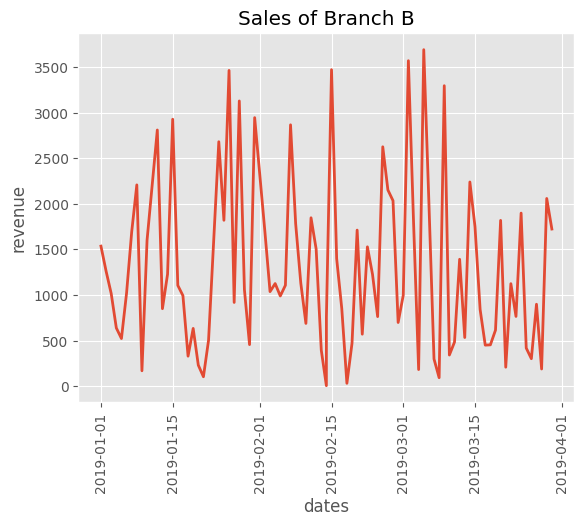

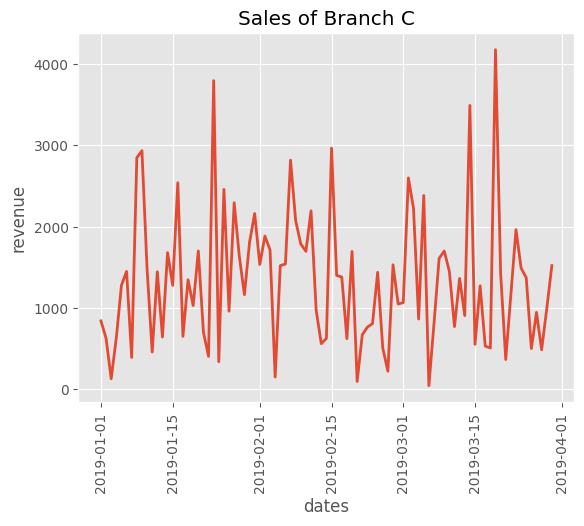

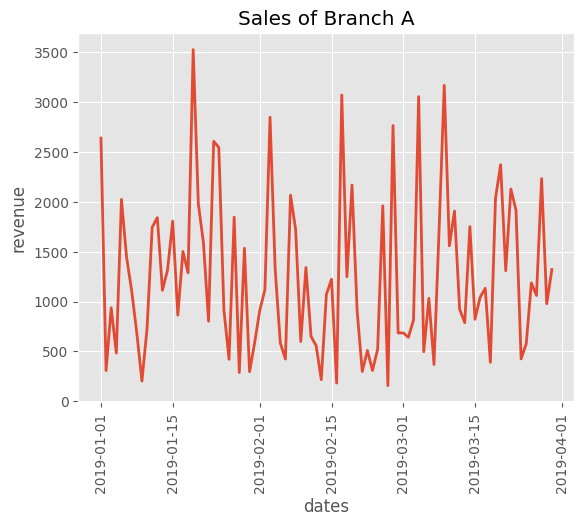

In [39]:
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')

# Выведем графики продаж по дивизионам:
for Div in set(list(df["Branch"])):
  Total_Dates = df[["Total", "Date"]][df["Branch"] == Div].groupby(["Date"], as_index=False).sum()
  plt.title("Sales of Branch {}".format(str(Div)))
  plt.xticks(rotation=90)
  plt.xlabel("dates")
  plt.ylabel("revenue")
  x = np.asarray(Total_Dates["Date"], dtype='datetime64[s]')
  plt.plot(x, Total_Dates["Total"], linewidth=2, markersize=20)

  plt.show()

**Подсказки:**

Как убрать лишние даты:

https://matplotlib.org/stable/gallery/ticks/ticks_too_many.html

convert to datetime64

x = np.asarray(x, dtype='datetime64[s]')

ax[1].plot(x, y, 'd')

ax[1].tick_params(axis='x', labelrotation=90)

ax[1].set_title('x converted to datetimes')



# 2. Гистограммы суммарных продаж

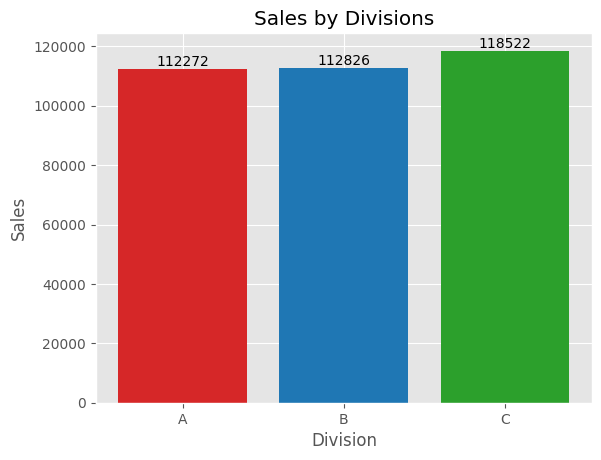

In [103]:
# 2.1 Суммарные продажи по каждому дивизиону
sales_by_division = df[["Total", "Branch"]].groupby(["Branch"], as_index=False).sum()
plt.title("Sales by Divisions")
x = sales_by_division["Branch"]
y = sales_by_division["Total"]
rects = plt.bar(x, y)
plt.bar_label(rects)
plt.xlabel("Division")
plt.ylabel("Sales")
bar_colors = ['tab:red', 'tab:blue', 'tab:green']
plt.bar(x, y, color=bar_colors, label=y)
plt.show()

**Подсказки:**

Как добавить цвета:

https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html

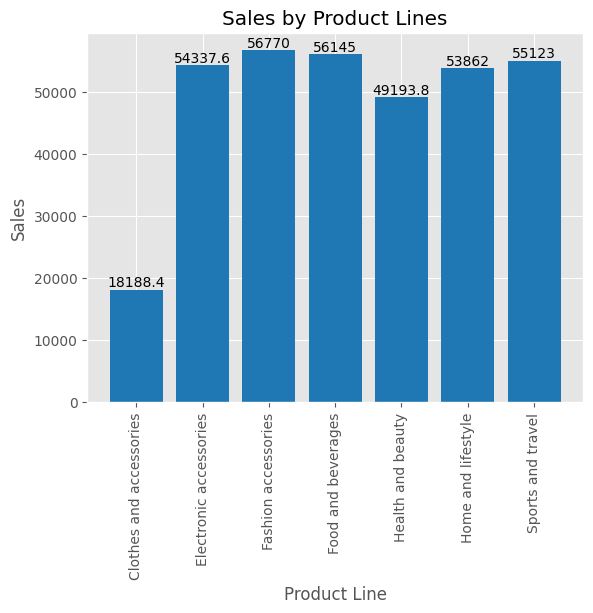

In [106]:
# 2.1 Суммарные продажи по каждому дивизиону
sales_by_division = df[["Total", "Product_line"]].groupby(["Product_line"], as_index=False).sum()
plt.xticks(rotation=90)
plt.title("Sales by Product Lines")
x = sales_by_division["Product_line"]
y = sales_by_division["Total"]
rects = plt.bar(x, y)
plt.bar_label(rects)
plt.xlabel("Product Line")
plt.ylabel("Sales")
plt.bar(x, y, color=['tab:blue'])
plt.show()

#3. Круговая гистограмма доли продаж мужчинам и женщинам

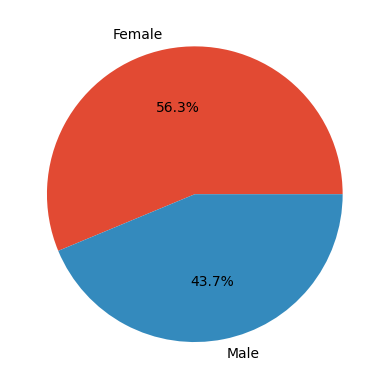

In [109]:
sales_by_gender = df[["Total", "Gender"]].groupby(["Gender"], as_index=False).sum()
sls = sales_by_gender["Total"]
lbs = sales_by_gender["Gender"]
plt.pie(sls, labels=lbs, autopct='%1.1f%%')
plt.show()

**Подсказки:**

Как строить круговые гистограммы:

https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

# 4. Выручка, прибыль и рентабельность товарных групп по месяцам

In [117]:
# Сгруппируем продажи, прибыль и рентабельность товарных групп по месяцам в разрезе товарных групп
# 1) добавим месяцы в Датафрейм
df['Date'] = df['Date'].astype('datetime64[ns]')
df['Month'] = df['Date'].dt.month
df

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Total,Date,Time,Payment,Payments_fee,Gross_income,Cost_price,Unit_cost,month,Month
0,765-26-6951,A,Yangon,Normal,Male,Sports and travel,76.24,6,457.44,2019-01-01,2023-11-05 10:39:00.000000000,Credit card,13.72,68.62,388.82,64.80,1,1
1,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,49.97,8,399.76,2019-01-01,2023-11-05 14:47:00.000000000,Cash,0.00,71.96,327.80,40.98,1,1
2,891-01-7034,B,Mandalay,Normal,Male,Electronic accessories,78.45,6,470.67,2019-01-01,2023-11-05 19:07:00.000000000,Cash,0.00,70.60,400.07,66.68,1,1
3,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,38.83,10,388.29,2019-01-01,2023-11-05 19:48:00.000000000,Credit card,11.65,58.24,330.05,33.01,1,1
4,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,66.38,2,132.76,2019-01-01,2023-11-05 15:51:00.000000000,Cash,0.00,19.91,112.85,56.43,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,291-55-6563,A,Yangon,Member,Female,Home and lifestyle,36.14,6,216.85,2019-03-30,2023-11-05 12:45:00.000000000,Ewallet,3.25,39.03,177.82,29.64,3,3
1165,361-85-2571,A,Yangon,Normal,Female,Sports and travel,93.95,5,469.77,2019-03-30,2023-11-05 10:18:00.000000000,Cash,0.00,70.47,399.30,79.86,3,3
1166,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,101.66,3,304.98,2019-03-30,2023-11-05 20:37:00.000000000,Cash,0.00,45.75,259.23,86.41,3,3
1167,115-38-7382,C,Naypyitaw,Member,Female,Fashion accessories,4.64,8,37.12,2019-03-30,2023-11-05 12:51:00.000000000,Credit card,1.11,9.28,27.84,3.48,3,3


**Подсказки**

Как извлекать из столбца формата даты и времени месяц:

https://stackoverflow.com/questions/26105804/extract-month-from-date-in-python

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice_ID     1169 non-null   object        
 1   Branch         1169 non-null   object        
 2   City           1169 non-null   object        
 3   Customer_type  1169 non-null   object        
 4   Gender         1169 non-null   object        
 5   Product_line   1169 non-null   object        
 6   Unit_price     1169 non-null   float64       
 7   Quantity       1169 non-null   int64         
 8   Total          1169 non-null   float64       
 9   Date           1169 non-null   datetime64[ns]
 10  Time           1169 non-null   object        
 11  Payment        1169 non-null   object        
 12  Payments_fee   1169 non-null   float64       
 13  Gross_income   1169 non-null   float64       
 14  Cost_price     1169 non-null   float64       
 15  Unit_cost      1169 n

In [126]:
# 2 Сгруппируем Выручку и Маржинальный доход по Товарным группам:
df_grouped = df[["Product_line", "Month", "Total", "Gross_income"]].groupby(["Month", "Product_line"], as_index=False).sum()

# 3 Добавим рентабельность:
df_grouped["Profitability"] = df_grouped["Gross_income"]/df_grouped["Total"]
df_grouped

,Month,Product_line,Total,Gross_income,Profitability
0,1,Clothes and accessories,7600.91,532.090000,0.070003
1,1,Electronic accessories,18831.33,2824.740000,0.150002
2,1,Fashion accessories,19345.14,4836.380000,0.250005
3,1,Food and beverages,19570.58,2348.490000,0.120001
4,1,Health and beauty,16383.20,3604.320000,0.220001
5,1,Home and lifestyle,20494.77,3689.070000,0.180001
6,1,Sports and travel,21667.09,3250.110000,0.150002
7,2,Clothes and accessories,6850.90,479.600000,0.070005
8,2,Electronic accessories,17362.93,2604.460000,0.150001
9,2,Fashion accessories,19014.92,4803.152877,0.252599


In [132]:
# 2 Построим требуемую таблицу, используя Сводную таблицу:
pd.pivot_table(df_grouped, values=["Total", "Gross_income",	"Profitability"],
               index=["Month", "Product_line"], columns=None, aggfunc='sum', fill_value=None, margins=False,
               dropna=True, margins_name='All', observed=False, sort=True)

Gross_income  Profitability     Total
Month Product_line                                                  
1     Clothes and accessories    532.090000       0.070003   7600.91
      Electronic accessories    2824.740000       0.150002  18831.33
      Fashion accessories       4836.380000       0.250005  19345.14
      Food and beverages        2348.490000       0.120001  19570.58
      Health and beauty         3604.320000       0.220001  16383.20
      Home and lifestyle        3689.070000       0.180001  20494.77
      Sports and travel         3250.110000       0.150002  21667.09
2     Clothes and accessories    479.600000       0.070005   6850.90
      Electronic accessories    2604.460000       0.150001  17362.93
      Fashion accessories       4803.152877       0.252599  19014.92
      Food and beverages        2400.050000       0.120000  20000.39
      Health and beauty         3212.520000       0.220001  14602.29
      Home and lifestyle        2238.170000       0.179999  12434.38
      Sports and travel         2071.470000       0.150001  13809.67
3     Clothes and accessories    261.610000       0.070013   3736.59
      Electronic accessories    2721.520000       0.150001  18143.38
      Fashion accessories       4602.560000       0.250004  18409.92
      Food and beverages        1988.860000       0.119999  16573.99
      Health and beauty         4005.860000       0.220001  18208.35
      Home and lifestyle        3767.900000       0.180000  20932.81
      Sports and travel         2946.900000       0.149998  19646.24

KeyError: ignored

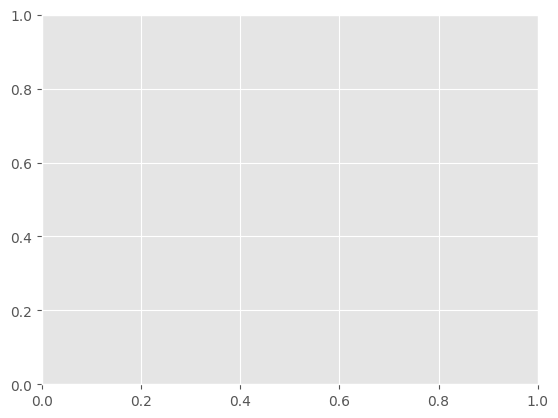

In [133]:
plt.table(df_grouped)